# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

Step 1 - Write code to Read data from dataset into pandas dataframe

In [11]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [12]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [13]:
df = df.drop("Pregnancies", axis=1)

# Verify the removel went through
df.head(5)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.600,0.627,50,1
1,85,66,29,0,26.600,0.351,31,0
2,183,64,0,0,23.300,0.672,32,1
3,89,66,23,94,28.100,0.167,21,0
4,137,40,35,168,43.100,2.288,33,1


Step 4 - Write code to display info of dataset and check shape of dataset.

In [14]:
df.info()
print("Dataset shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
Dataset shape: (768, 8)


Step 5 - Write code to clean data

In [26]:
cols_with_zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with median of the column because 0 is not a valid value for these features 
# (Glucose, BloodPressure, SkinThickness, Insulin, BMI) and indicates missing or incorrect data.
for col in cols_with_zero_as_missing:
    df[col] = df[col].replace(0, df[col].median())


df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,121.656,72.387,27.335,94.652,32.451,0.472,33.241,0.349
std,30.438,12.097,9.229,105.548,6.875,0.331,11.760,0.477
min,44.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
25%,99.750,64.000,23.000,30.500,27.500,0.244,24.000,0.000
50%,117.000,72.000,23.000,31.250,32.000,0.372,29.000,0.000
75%,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [17]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Splits 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checks the shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 7)
X_test shape: (154, 7)
y_train shape: (614,)
y_test shape: (154,)


#### **Step #7: Initialize your model**




In [25]:
nb_model = GaussianNB() # what i did not do 

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)


nb_model.fit(X_train_scaled, y_train) # trains y for the y_pred

# predictions on the test set
y_pred = nb_model.predict(X_test_scaled)

#  the model
print("Accuracy:", accuracy_score(y_test, y_pred)) # Takes x and y to check the accuracy 

print("Classification Report:\n", classification_report(y_test, y_pred)) # takes the tested y and y pred



Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Step 9 - Predict using model on test data

In [20]:
y_pred = nb_model.predict(X_test_scaled)

# Display the first 10 predictions
print("Predictions on test data:", y_pred[:10])

Predictions on test data: [0 0 0 0 0 1 0 0 1 1]


Step 10 -  Find accuracy of model

In [21]:
accuracy = accuracy_score(y_test, y_pred)  # Accuarcy of model
print("Accuracy of the Naive Bayes model:", accuracy)

Accuracy of the Naive Bayes model: 0.7532467532467533


Step 11 - Confusion Matrix

Confusion Matrix:
 [[81 18]
 [20 35]]


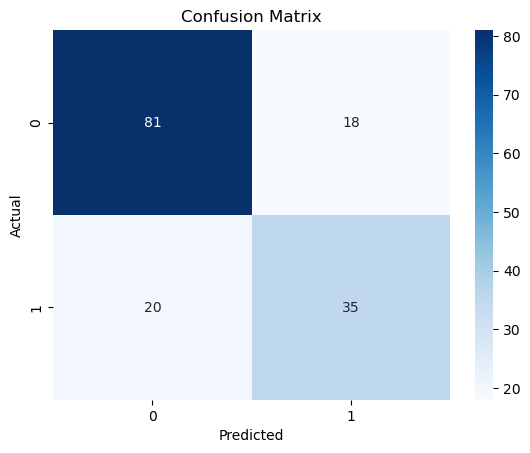

In [22]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confustion Matrix display
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Refelection 